<a href="https://colab.research.google.com/github/AlejandroJabobo/THC-tareas/blob/main/Proyecto2python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas matplotlib

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
link='https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv'
code='?raw=true'
url=link+code
df=pd.read_csv(url,sep=',',index_col=1)

In [ ]:
df

,Country,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
Date,,,,,,,,,,,
29/08/2014,Guinea,482,287.0,289.2,192.8,86.76,57.84,173.52,115.68,28.92,19.28
29/08/2014,Nigeria,15,6.0,9.0,6.0,2.70,1.80,5.40,3.60,0.90,0.60
29/08/2014,Sierra Leone,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
29/08/2014,Liberia,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88
05/09/2014,Guinea,604,362.0,362.4,241.6,108.72,72.48,217.44,144.96,36.24,24.16
...,...,...,...,...,...,...,...,...,...,...,...
23/03/2016,Liberia,3151,NaN,1890.6,1260.4,567.18,378.12,1134.36,756.24,189.06,126.04
23/03/2016,Italy,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
23/03/2016,Liberia,2,1.0,1.2,0.8,0.36,0.24,0.72,0.48,0.12,0.08


In [ ]:
df = pd.read_csv(url, sep=',')

# Convertir la columna 'Date' al formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Verificar si la columna 'Date' ya es el índice
if 'Date' not in df.columns:
    # Si no, establecerla como índice
    df.set_index('Date', inplace=True)


<ipython-input-6-3d1c88080def>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df

,Country,Date,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
0,Guinea,2014-08-29,482,287.0,289.2,192.8,86.76,57.84,173.52,115.68,28.92,19.28
1,Nigeria,2014-08-29,15,6.0,9.0,6.0,2.70,1.80,5.40,3.60,0.90,0.60
2,Sierra Leone,2014-08-29,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
3,Liberia,2014-08-29,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88
4,Guinea,2014-05-09,604,362.0,362.4,241.6,108.72,72.48,217.44,144.96,36.24,24.16
...,...,...,...,...,...,...,...,...,...,...,...,...
2479,Liberia,2016-03-23,3151,NaN,1890.6,1260.4,567.18,378.12,1134.36,756.24,189.06,126.04
2480,Italy,2016-03-23,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
2481,Liberia,2016-03-23,2,1.0,1.2,0.8,0.36,0.24,0.72,0.48,0.12,0.08
2482,Nigeria,2016-03-23,19,7.0,11.4,7.6,3.42,2.28,6.84,4.56,1.14,0.76


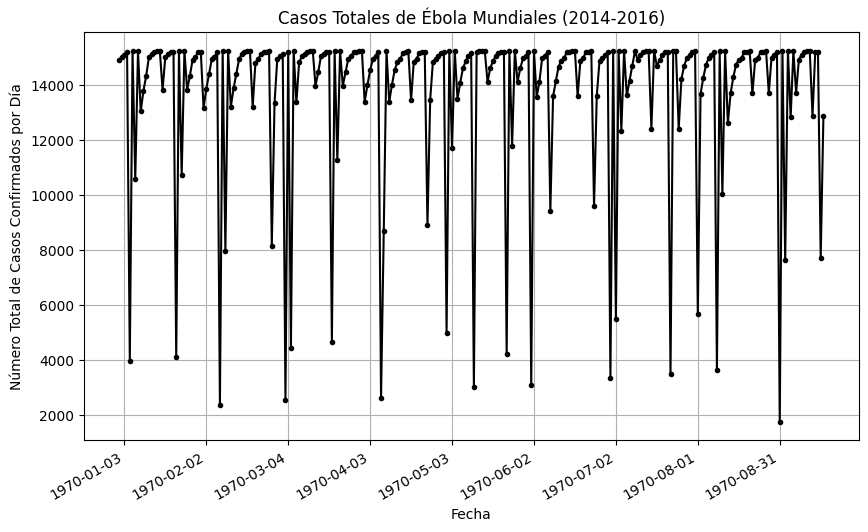

In [ ]:
from matplotlib.dates import DateFormatter, DayLocator
df = df.groupby('Date')['No. of confirmed cases'].sum().reset_index()

# Establecer la columna 'Date' como índice
df.set_index('Date', inplace=True)

# Graficar los casos totales cronológicamente
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['No. of confirmed cases'], marker='.', linestyle='-', color='k')
plt.title('Casos Totales de Ébola Mundiales (2014-2016)')
plt.xlabel('Fecha')
plt.ylabel('Número Total de Casos Confirmados por Día')

#Enseñar las fechas en el eje x
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(DayLocator(interval=30))

plt.gcf().autofmt_xdate()

plt.grid(True)
plt.show()

In [ ]:
df = pd.read_csv(url, sep=',')

# Convertir la columna 'Date' al formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Verificar si la columna 'Date' ya es el índice
if 'Date' not in df.columns:
    # Si no, establecerla como índice
    df.set_index('Date', inplace=True)


df.head()



<ipython-input-37-810702c23c74>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


,Country,Date,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
0,Guinea,2014-08-29,482,287.0,289.2,192.8,86.76,57.84,173.52,115.68,28.92,19.28
1,Nigeria,2014-08-29,15,6.0,9.0,6.0,2.70,1.80,5.40,3.60,0.90,0.60
2,Sierra Leone,2014-08-29,935,380.0,561.0,374.0,168.30,112.20,336.60,224.40,56.10,37.40
3,Liberia,2014-08-29,322,225.0,193.2,128.8,57.96,38.64,115.92,77.28,19.32,12.88
4,Guinea,2014-05-09,604,362.0,362.4,241.6,108.72,72.48,217.44,144.96,36.24,24.16


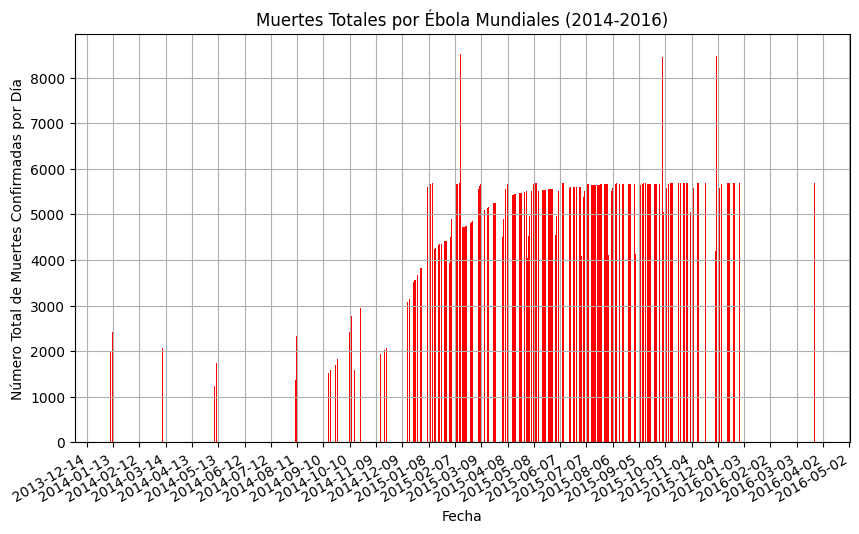

In [ ]:

# Agrupar por fecha y sumar el número total de muertes
df_muertes = df.groupby('Date')['No. of confirmed deaths'].sum().reset_index()

# Establecer la columna 'Date' como índice
df_muertes.set_index('Date', inplace=True)

# Graficar los casos totales de muertes cronologicamente
plt.figure(figsize=(10, 6))
plt.bar(df_muertes.index, df_muertes['No. of confirmed deaths'], color='r')
plt.title('Muertes Totales por Ébola Mundiales (2014-2016)')
plt.xlabel('Fecha')
plt.ylabel('Número Total de Muertes Confirmadas por Día')

# Enseñar las fechas en el eje x
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(DayLocator(interval=30))

plt.gcf().autofmt_xdate()

plt.grid(True)
plt.show()

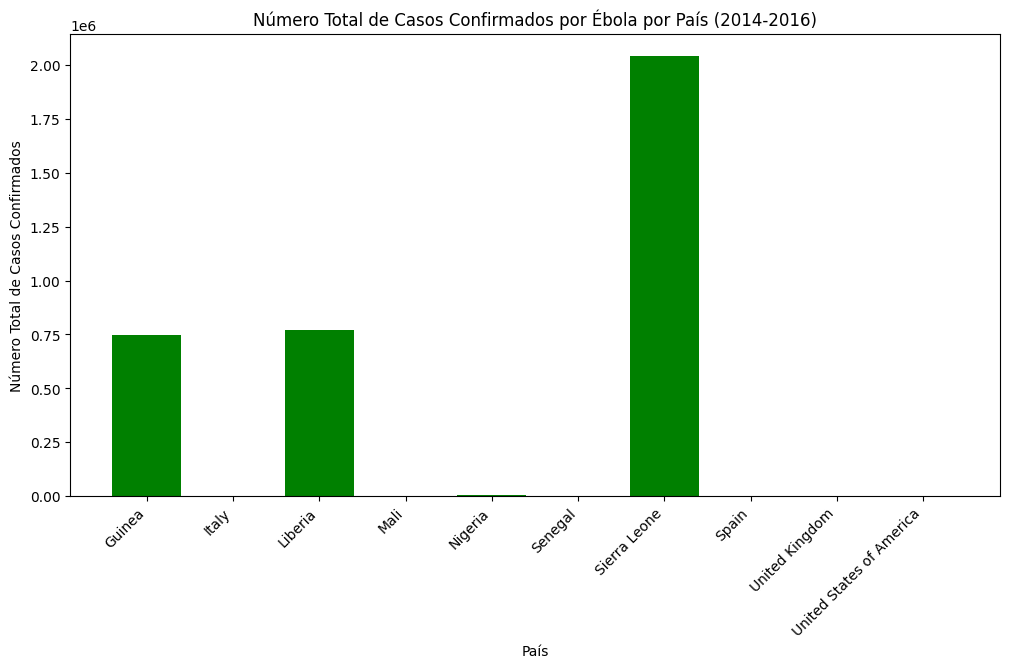

In [ ]:
# Agrupar por país y sumar el número total de casos confirmados
df_casos_por_pais = df.groupby('Country')['No. of confirmed cases'].sum().reset_index()

# Graficar el número total de casos confirmados por país en un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_casos_por_pais['Country'], df_casos_por_pais['No. of confirmed cases'], color='g')
plt.title('Número Total de Casos Confirmados por Ébola por País (2014-2016)')
plt.xlabel('País')
plt.ylabel('Número Total de Casos Confirmados')

# Enseñar los paises en el eje x
plt.xticks(rotation=45, ha='right')

plt.show()

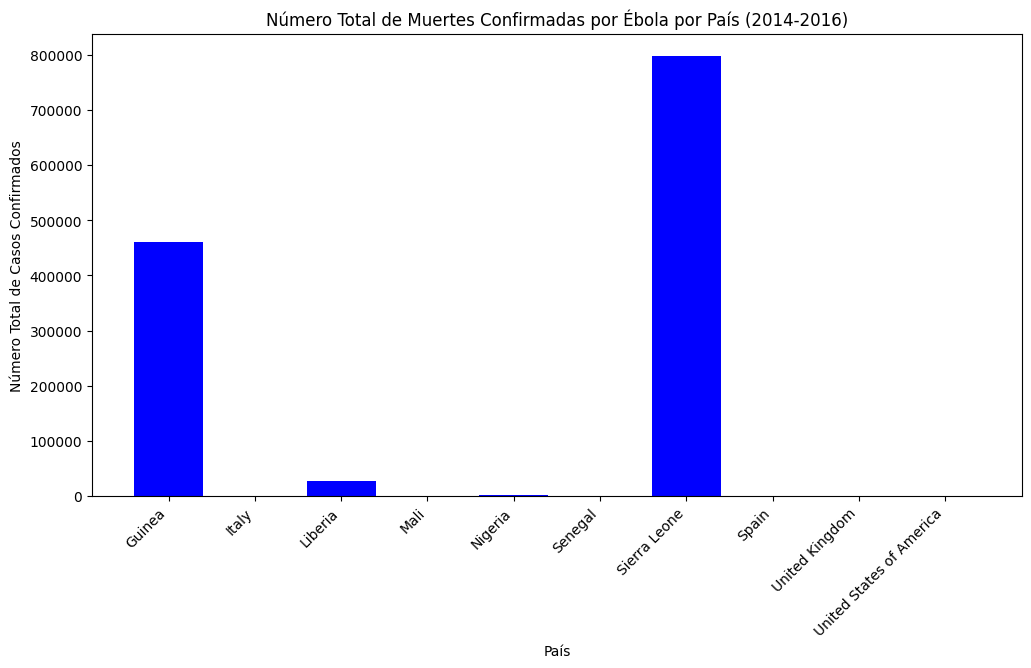

In [ ]:
# Agrupar por país y sumar el número total de casos confirmados
df_casos_por_pais = df.groupby('Country')['No. of confirmed deaths'].sum().reset_index()

# Graficar el número total de casos confirmados por país en un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_casos_por_pais['Country'], df_casos_por_pais['No. of confirmed deaths'], color='b')
plt.title('Número Total de Muertes Confirmadas por Ébola por País (2014-2016)')
plt.xlabel('País')
plt.ylabel('Número Total de Casos Confirmados')

# Enseñar los paises en el eje x
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
df['Country']=='United Kingdom'

0       False
1       False
2       False
3       False
4       False
        ...  
2479    False
2480    False
2481    False
2482    False
2483    False
Name: Country, Length: 2484, dtype: bool

In [ ]:
SL=df[df['Country']=='United Kingdom']

In [ ]:
SL=SL.drop('Country',axis=1)

In [ ]:
SL

,Country,Date,No. of confirmed cases,No. of confirmed deaths,Male Cases,Female Cases,Boys,Girls,Adult Male,Adult Female,Old Male,Old Female
266,United Kingdom,2015-02-01,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
279,United Kingdom,2015-05-01,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
290,United Kingdom,2015-06-01,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
297,United Kingdom,2015-07-01,1,0.0,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
302,United Kingdom,2015-08-01,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...
2433,United Kingdom,2015-12-17,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
2446,United Kingdom,2015-12-22,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
2450,United Kingdom,2015-12-23,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04
2461,United Kingdom,2015-12-29,1,NaN,0.6,0.4,0.18,0.12,0.36,0.24,0.06,0.04


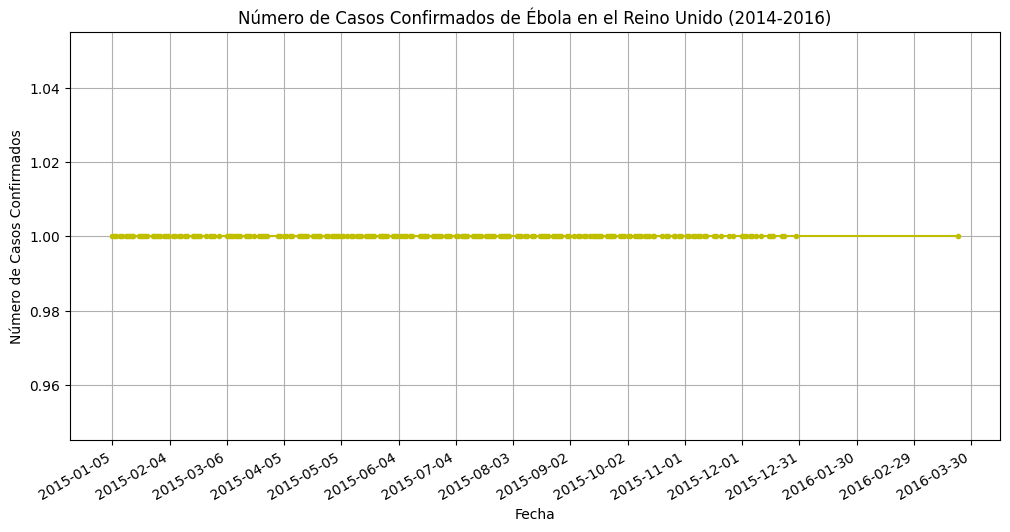

In [ ]:
# Filtra el DataFrame para mostrar solo los casos en el Reino Unido
df_uk = df[df['Country'] == 'United Kingdom']

# Agrupa por fecha y sumar el número total de casos confirmados en el Reino Unido
df_casos_uk_por_fecha = df_uk.groupby('Date')['No. of confirmed cases'].sum().reset_index()

# Establece la columna 'Date' como índice
df_casos_uk_por_fecha.set_index('Date', inplace=True)

# Graficar el número de casos confirmados en el Reino Unido por fecha
plt.figure(figsize=(12, 6))
plt.plot(df_casos_uk_por_fecha.index, df_casos_uk_por_fecha['No. of confirmed cases'], marker='.', linestyle='-', color='y')
plt.title('Número de Casos Confirmados de Ébola en el Reino Unido (2014-2016)')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos Confirmados')

# # Enseñar las fechas en el eje x
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(DayLocator(interval=30))

plt.gcf().autofmt_xdate()

plt.grid(True)
plt.show()

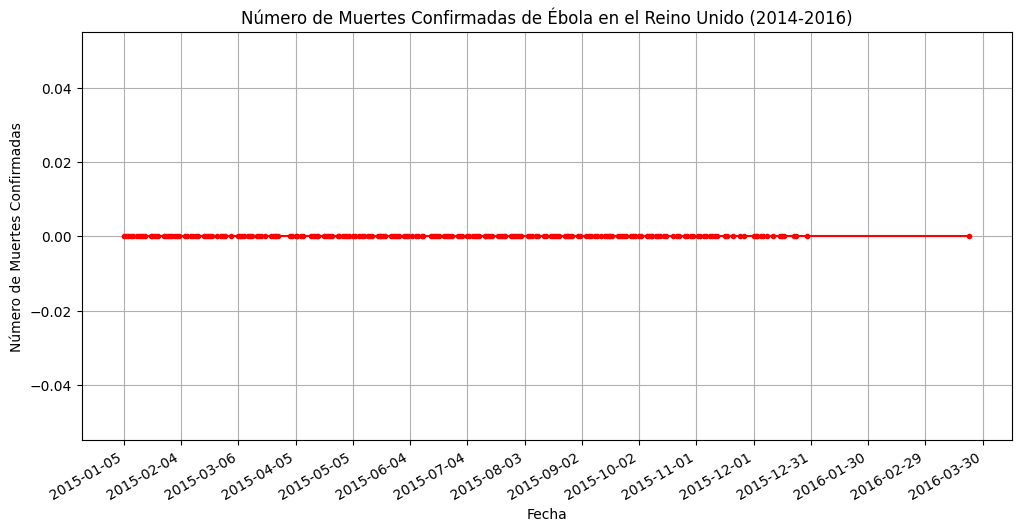

In [ ]:
# Filtra el DataFrame para mostrar solo las muertes confirmadas en el Reino Unido
df_uk_muertes = df[df['Country'] == 'United Kingdom']

# Agrupa por fecha y suma el número total de muertes confirmadas en el Reino Unido
df_muertes_uk_por_fecha = df_uk_muertes.groupby('Date')['No. of confirmed deaths'].sum().reset_index()

# Establece la columna 'Date' como índice
df_muertes_uk_por_fecha.set_index('Date', inplace=True)

# Graficar el número de muertes confirmadas en el Reino Unido por fecha
plt.figure(figsize=(12, 6))
plt.plot(df_muertes_uk_por_fecha.index, df_muertes_uk_por_fecha['No. of confirmed deaths'], marker='.', linestyle='-', color='r')
plt.title('Número de Muertes Confirmadas de Ébola en el Reino Unido (2014-2016)')
plt.xlabel('Fecha')
plt.ylabel('Número de Muertes Confirmadas')

# Enseñar las fechas en el eje x
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(DayLocator(interval=30))

plt.gcf().autofmt_xdate()

plt.grid(True)
plt.show()


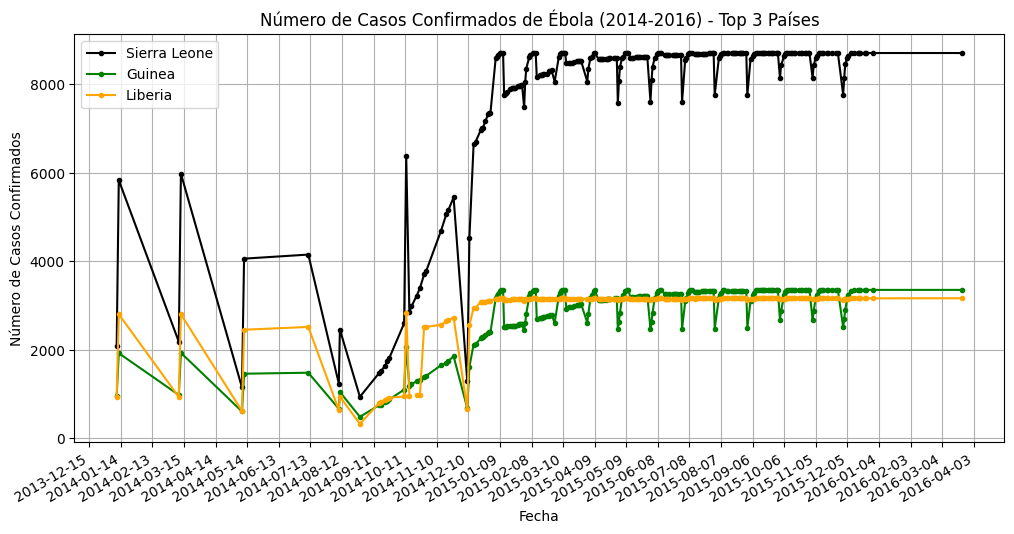

In [ ]:
# Identifica los tres países con más casos confirmados
top_paises = df.groupby('Country')['No. of confirmed cases'].max().sort_values(ascending=False).head(3).index

# Filtra el DataFrame para incluir solo los tres países principales
df_top_paises = df[df['Country'].isin(top_paises)]

# Agrupa por fecha y país, sumando el número total de casos confirmados
df_casos_por_fecha_y_pais = df_top_paises.groupby(['Date', 'Country'])['No. of confirmed cases'].sum().unstack().reset_index()

# Graficar el número de casos confirmados por fecha para los tres países principales
plt.figure(figsize=(12, 6))
plt.plot(df_casos_por_fecha_y_pais['Date'], df_casos_por_fecha_y_pais[top_paises[0]], marker='.', linestyle='-', label=top_paises[0],color='black')
plt.plot(df_casos_por_fecha_y_pais['Date'], df_casos_por_fecha_y_pais[top_paises[1]], marker='.', linestyle='-', label=top_paises[1],color='green')
plt.plot(df_casos_por_fecha_y_pais['Date'], df_casos_por_fecha_y_pais[top_paises[2]], marker='.', linestyle='-', label=top_paises[2],color='orange')

plt.title('Número de Casos Confirmados de Ébola (2014-2016) - Top 3 Países')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos Confirmados')
plt.legend()

# Enseñar las fechas en el eje x
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(DayLocator(interval=30))

plt.gcf().autofmt_xdate()

plt.grid(True)
plt.show()

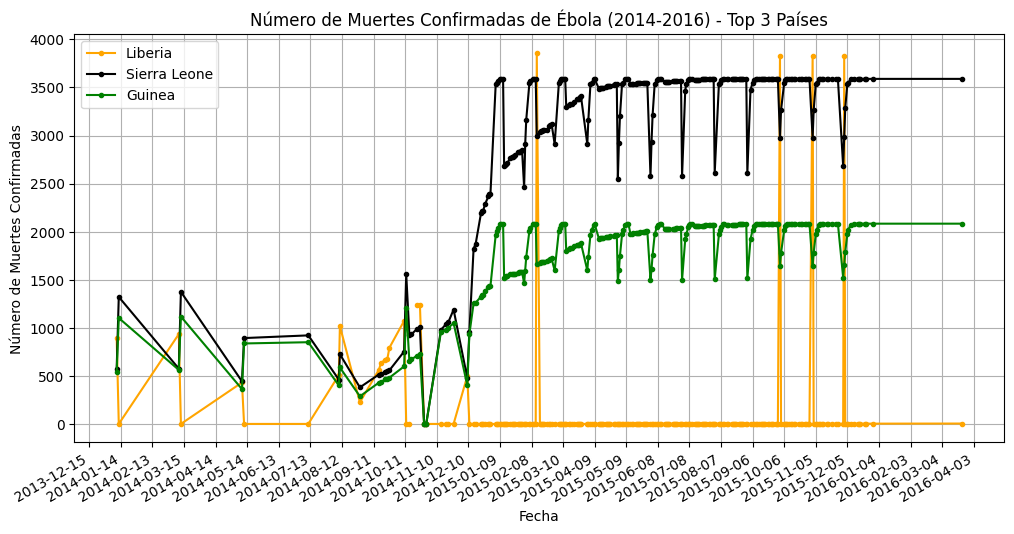

In [ ]:
# Identifica los tres países con más casos confirmados
top_paises = df.groupby('Country')['No. of confirmed deaths'].max().sort_values(ascending=False).head(3).index

# Filtra el DataFrame para incluir solo los tres países principales
df_top_paises = df[df['Country'].isin(top_paises)]

# Agrupa por fecha y país, sumando el número total de muertes confirmadas
df_muertes_por_fecha_y_pais = df_top_paises.groupby(['Date', 'Country'])['No. of confirmed deaths'].sum().unstack().reset_index()

# Graficar el número de muertes confirmadas por fecha para los tres países principales
plt.figure(figsize=(12, 6))
plt.plot(df_muertes_por_fecha_y_pais['Date'], df_muertes_por_fecha_y_pais[top_paises[0]], marker='.', linestyle='-', label=top_paises[0], color='orange')
plt.plot(df_muertes_por_fecha_y_pais['Date'], df_muertes_por_fecha_y_pais[top_paises[1]], marker='.', linestyle='-', label=top_paises[1], color='black')
plt.plot(df_muertes_por_fecha_y_pais['Date'], df_muertes_por_fecha_y_pais[top_paises[2]], marker='.', linestyle='-', label=top_paises[2], color='green')

plt.title('Número de Muertes Confirmadas de Ébola (2014-2016) - Top 3 Países')
plt.xlabel('Fecha')
plt.ylabel('Número de Muertes Confirmadas')
plt.legend()

# Enseñar las fechas en el eje x
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(DayLocator(interval=30))

plt.gcf().autofmt_xdate()

plt.grid(True)
plt.show()